In [1]:
import librosa
import numpy as np
import torch
import torch.nn as nn
import os
import argparse
import time
#from model import ConvTasNet, MB_ConvTasNet,MS_SL2_split_model
from model import MB_ConvTasNet

# Load speech signal
speech_file = '/media/speech70809/Data011/speech_donoiser_new/datasets/NER_clean_cv_old/BG_20170209_115.wav'
speech, sr = librosa.load(speech_file, sr=None)

# Define CNN architecture for temporal envelope reconstruction
class TemporalEnvelopeCNN(nn.Module):
    def __init__(self):
        super(TemporalEnvelopeCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2),
            nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(64 * (speech.shape[0] // 4), 128),
            nn.ReLU(),
            nn.Linear(128, speech.shape[0])
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

# Convert speech signal to PyTorch tensor
speech_tensor = torch.from_numpy(speech).unsqueeze(0).unsqueeze(1).float()

# Instantiate the CNN model
model = MB_ConvTasNet()

# Load pre-trained model weights
# model.load_state_dict(torch.load('/media/speech70809/Data022/MS_SL2_split_256channelWise_w4_16batch_models/48.pt.tar'))

# Set the model to evaluation mode
model.eval()

# Pass the speech signal through the model to reconstruct the temporal envelope
reconstructed_envelope = model(speech_tensor)

# Convert the reconstructed envelope to a numpy array
reconstructed_envelope = reconstructed_envelope.detach().numpy()

ImportError: cannot import name 'MB_ConvTasNet' from 'model' (/media/speech70809/Data011/speech_donoiser_new/main/nnet/model.py)

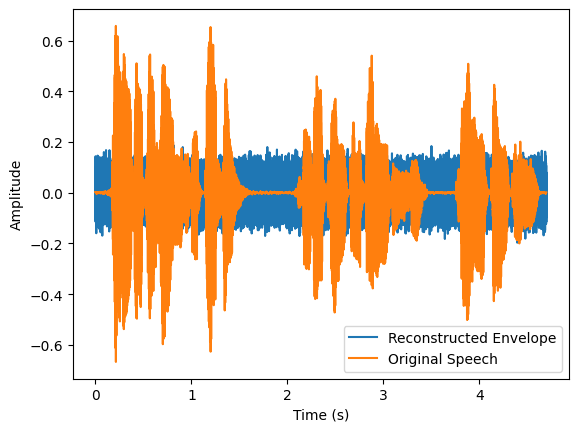

In [2]:
# Plot the original and reconstructed envelopes
import matplotlib.pyplot as plt
time = np.arange(reconstructed_envelope.shape[1]) / sr
plt.plot(time, reconstructed_envelope.squeeze(), label='Reconstructed Envelope')
plt.plot(time, speech[:reconstructed_envelope.shape[1]], label='Original Speech')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()